---------------------------------------------------------------------------------------------------------------------------------
## Importing the Dataset




In [41]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [42]:
diabetesData = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

#verify that the csv file is imported properly
diabetesData.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [43]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Observations made from a quick glance:
* There are `21` variables and `70692` samples in the dataset.
* All the variables are identified as `float64`, even though there exists `boolean` type data (Diabetes_binary, PhysActivity etc.)
* None of the variables seem to have any missing value.

### Description of the dataset:

**Diabetes_binary:** Whether the respondent has diabetes <br>
> 1 indicates that the respondent has prediabetes or diabetes and 0 indicates that the respondent does not have diabetes<br> 

**HighBP:** Whether the respondent has high blood pressure <br>
> 1 indicates that the respondent has high blood pressure and 0 indicates that the respondent does not have high blood pressure

**HighChol:** Whether the respondent has high cholesterol <br>
> 1 indicates that the respondent has high cholesterol and 0 indicates that the respondent does not have high cholesterol

**CholCheck:** Whether the respondent has had a cholesterol check in the past 5 years
> 1 indicates that the respondent has had a cholesterol check in the past 5 years and 0 indicates that the respondent did not have a cholesterol check in the past 5 years

**BMI:** Body Mass Index (BMI) calculation of the respondent
> BMI is calculated by weight in kilograms divided by height in metres squared 

**Smoker:** Whether the respondent has smoked at least 100 cigarettes in his or her life
> 1 indicates that the respondent has smoked at least 100 cigarettes in his or her life and 0 indicates that the respondent has not smoked at least 100 cigarettes in his or her life

**Stroke:** Whether the respondent has had a stroke
> 1 indicates that the respondent has had a stroke and 0 indicated that the respondent did not have a stroke before

**HeartDiseaseorAttack:** Whether the respondent has coronary heart disease (CHD) or myocardial infarction (MI)
> 1 indicates that the respondent has either one of these heart diseases and 0 indicates that the respondent did not have either of these heart diseases

**PhysActivity:** Whether the respondent had participated in any form of physical activity in the past 30 days not including their job
>1 indicates that the respondent has participated in physical activity and 0 indicates that the respondent did not participate in any physical activity in the past 30 days not including their job

**Fruits:** Whether the respondent consumes fruit 1 or more times a day
> 1 indicates that the respondent consumes fruits 1 or more times a day and 0 indicates that the respondent does not consume fruits 1 or more times a day

**Veggies:** Whether the respondent consumes vegetable 1 or more times a day
> 1 indicates that the respondent consumes vegetables 1 or more times a day and 0 indicates that the respondent does not consume vegetables 1 or more times a day

**HvyAlcoholConsump:** Whether the respondent is a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
> 1 indicates that the respondent is a heavy drinker and 0 indicates that the respondent is not a heavy drinker

**AnyHealthcare:** Whether the respondent has any kind of health care coverage (e.g. health insurance)
> 1 indicates that the respondent has health care coverage and 0 indicates that the respondent does not have any kind of health care coverage

**NoDocbcCost:** Whether there was a time in the past 12 months where the respondent needed to see a doctor but could not because of cost
> 1 indicates that there was a time in the past 12 months where the respondent needed to see a doctor but could not because of cost and 0 indicates that there was not a time in the past 12 months where the respondent needed to see a doctor but could not because of cost.

**GenHlth:**  What the respondent's health is in general from on a scale of 1-5
> 1 indicates excellent, 2 indicates very good, 3 indicares good, 4 indicates fair and 5 indicates poor

**MentHlth:** The number of days in the past 30 days where the respondent experienced poor mental health (inclusive of stress, depression, problems with emotions etc.)
> Scale of 1-30 days. 1 indicates 1 day where the respondent experienced poor mental health and 30 indicates 30 days where the respondent experienced poor mental health

**PhysHlth:** The number of days in the past 30 days where the respondent had poor physical health (inclusive of physical illness, injury etc.)
> Scale of 1-30 days. 1 indicates 1 day where the respondent had poor physical health and 30 indicates 30 days where the respondent had poor physical health

**DiffWalk:** Whether the repsondent has serious difficulty with walking or climbing stairs
> 1 indicates that the respondent has serious difficulty with walking or climbing stairs and 0 indicates that the respondent does not have serious difficulty with walking or climbing stairs

**Sex:** Whether the respondent is male or female
> 1 indicates that the respondent is male and 0 indicates that the respondent is female

**Age:** The respondent's age in categories with 6 year intervals
> 1 indicates that the respondent's age is in the 18-24 category and 13 indicates that the respondent's age is >80, in the intervals of 6 years per category.

**Education:** The respondent's highest level of education on a scale of 1-6

> 1 indicates that the respondent never attended school or only attended kindergarten.  
> 2 indicates that the respondent attended Grades 1 through 8 (Elementary).  
> 3 indicates that the respondent attended grades 9 through 11 (Some high school).  
> 4 indicates that the respondent attended grade 12 or GED (High school graduate).  
> 5 indicates that the respondent attended College 1 year to 3 years (Some college or technical school).  
> 6 indicates that the respondent attended College 4 years or more (College graduate).


**Income:** The respondent's annual household income in categories with 5,000 intervals

> 1 indicates that the respondent's annual household income is less than 10,000.
> 2 indicates that the respondent's annual household income is more than 10,000 but less than 15,000.
> 8 indicates that the respondent's annual household income is more than 75,000. The interval is 5,000 per category.




In [44]:
diabetesData.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

After checking, we can confirm that none of the variables have missing values.

In [45]:
diabetesData.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


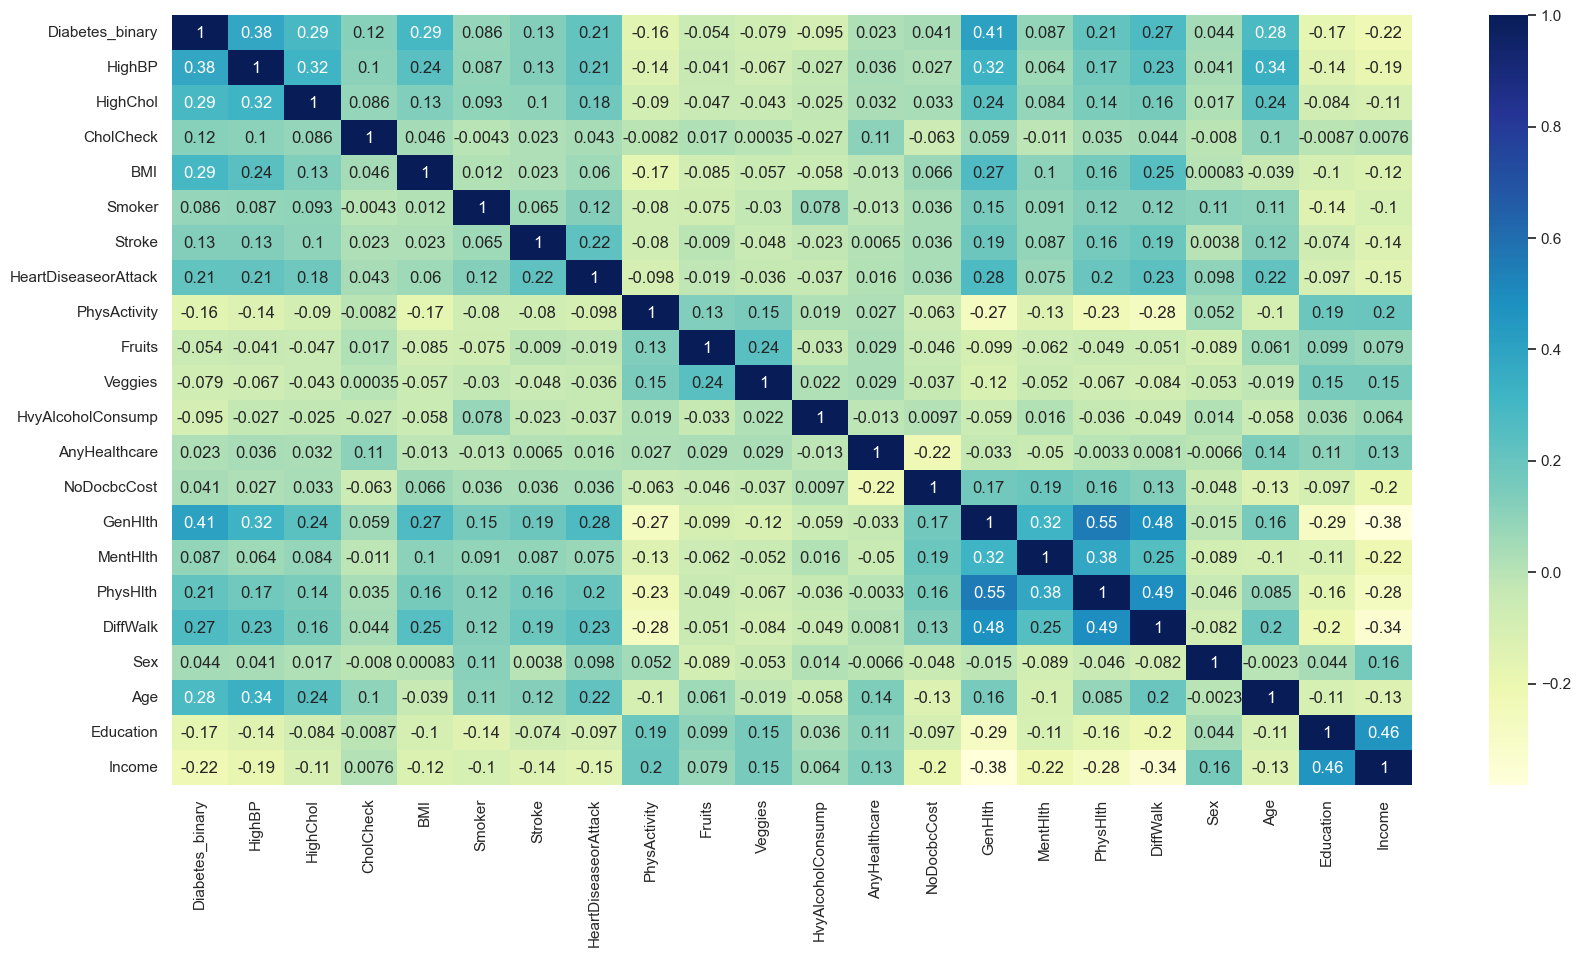

In [46]:
plt.figure(figsize=(20,10))
sb.heatmap(diabetesData.corr(), annot=True, cmap="YlGnBu")
plt.show()

This heatmap allows us to identify factors with stronger correlations to `Diabetes_binary`. The first row provides precise correlation coefficient values for these relationships. We've isolated factors with correlation coefficients exceeding |0.2| as significant variables. 

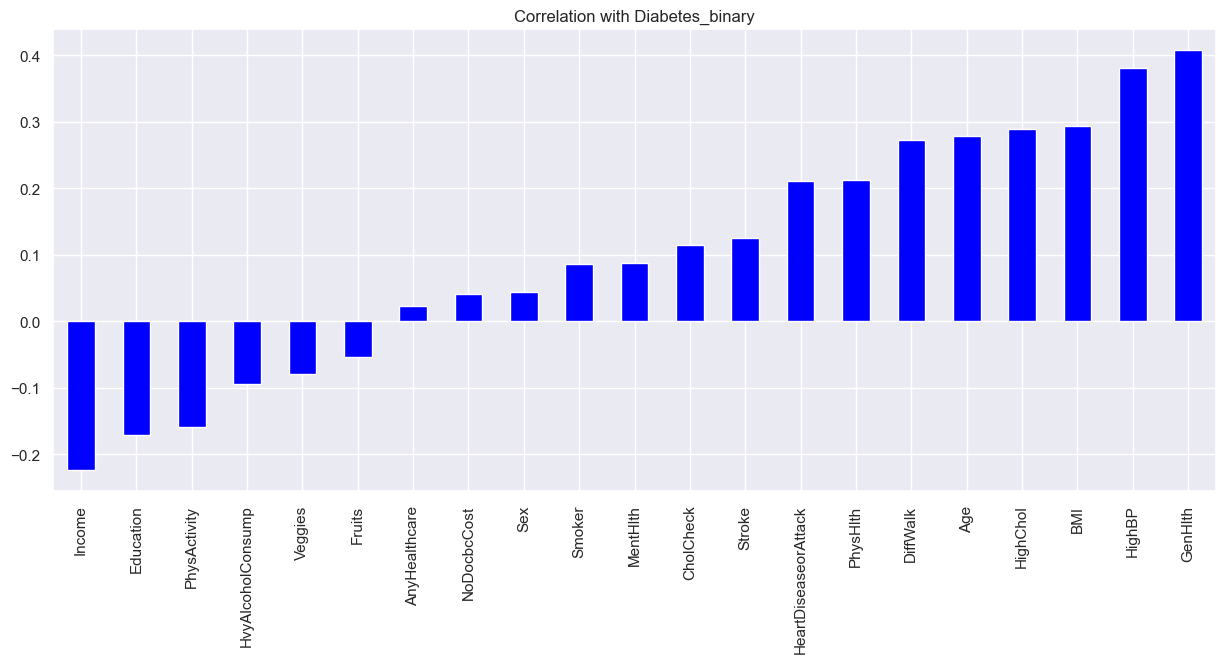

In [47]:
diabetesData.drop('Diabetes_binary', axis=1).corrwith(diabetesData.Diabetes_binary).sort_values().plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

Significant Risk Factor
- `GenHealth` (most significant)
- `HighBP`
- `BMI`
- `HighChol`
- `Age`
- `Income`
- `DiffWalk` 
- `PhysHealth` 

The bar graph allows us to easily filter out factors with correlation coefficients above |0.2| at one glance, indicating significant associations with `Diabetes_binary`. We considered correlation coefficients above |0.2| as significant, as they indicate moderate to strong associations with diabetes presence. Notably, `GenHlth` emerges as the most significant factor, strongly correlating with diabetes presence. Interestingly, `Income` is the only variable negatively correlated with `Diabetes_binary`, suggesting that higher incomes relate to lower diabetes likelihood, possibly due to a lack of access to healthcare and other lifestyle factors.

In [48]:
numeric_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'BMI', 'PhysHlth']])
binary_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'HighBP', 'HighChol','DiffWalk']])
oneHot_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'GenHlth', 'Age', 'Income']])

In [49]:
#replacing the 1s ana 0s in the binary dataset to True and False
binary_data.replace([1.0 ,0.0], [True, False], inplace = True)

In [50]:
#Checking to ensure that the replacement is correct
binary_data.head()

,Diabetes_binary,HighBP,HighChol,DiffWalk
0,False,True,False,False
1,False,True,True,False
2,False,False,False,False
3,False,True,True,False
4,False,False,False,False


---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Numerical Data
1. PhysHlth
2. BMI

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### PhysHlth
#### Uni Variate Statistics

<Axes: xlabel='PhysHlth', ylabel='Diabetes_binary'>

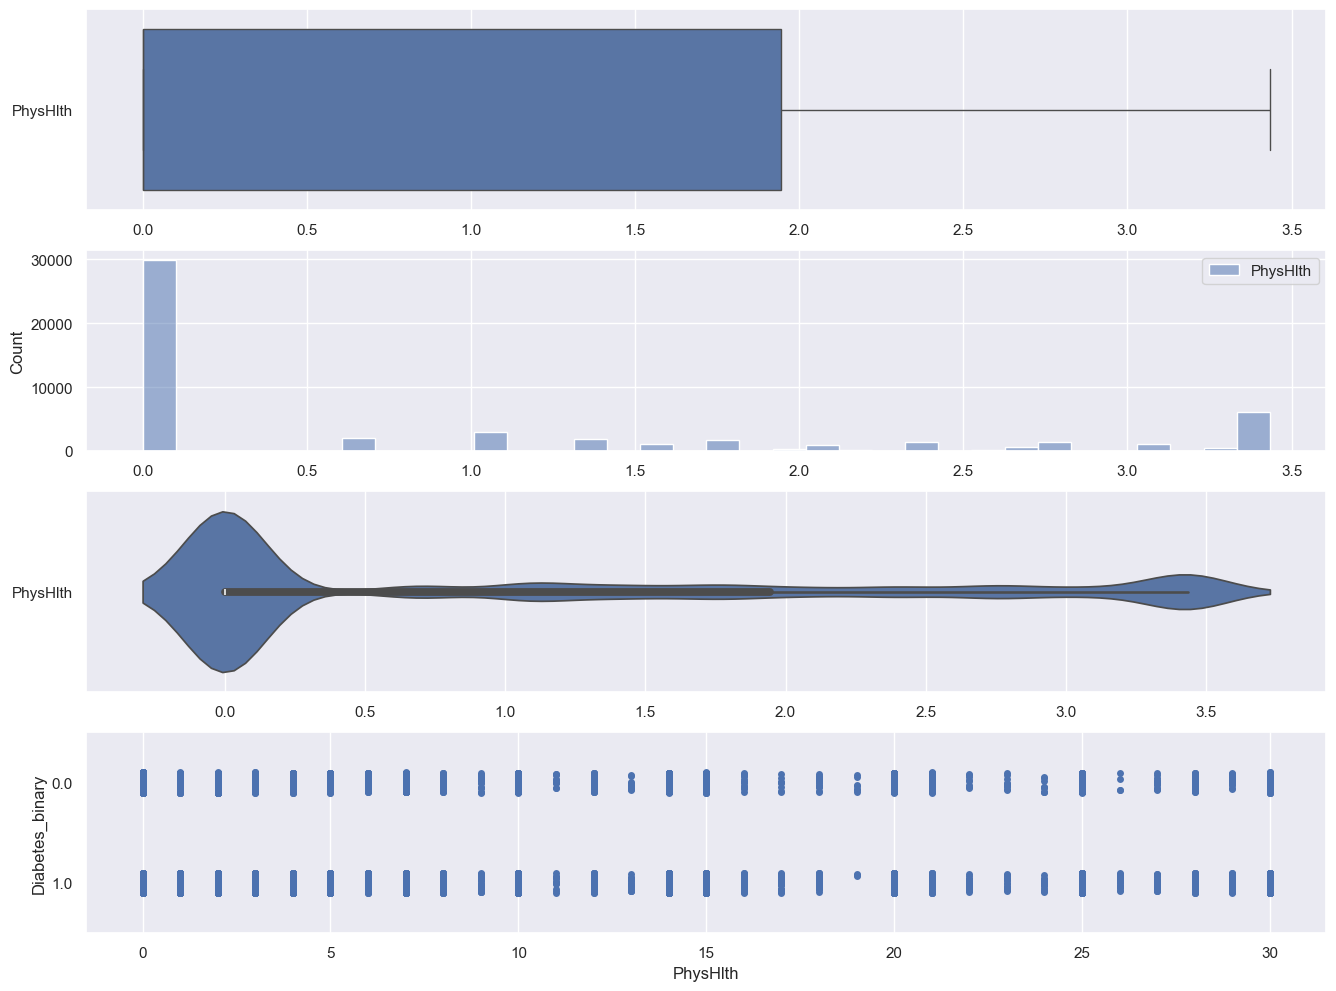

In [54]:
f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for PhysHlth
sb.boxplot(data = PhysHlth_train, orient = "h", ax = axes[0])
sb.histplot(data = PhysHlth_train, ax = axes[1])
sb.violinplot(data = PhysHlth_train, orient = "h", ax = axes[2])
sb.stripplot(x = numeric_data['PhysHlth'], y = numeric_data['Diabetes_binary'], data = PhysHlth_train_DF, orient = "h", ax = axes[3])


From the histogram plot, we are able to see that the data is heavily right skewed, with approximately 30,000 respondents out of about 70,000 respondents indicating that they did not have a single day out of 30 days where they had poor physical health (illness or injury).

[Text(0.41304347826086957, 0.9, 'PhysHlth <= 1.498\ngini = 0.5\nsamples = 53019\nvalue = [26510.0, 26509.0]\nclass = no diabetes'),
 Text(0.17391304347826086, 0.7, 'PhysHlth <= 0.896\ngini = 0.491\nsamples = 36942\nvalue = [21001, 15941]\nclass = no diabetes'),
 Text(0.08695652173913043, 0.5, 'PhysHlth <= 0.347\ngini = 0.487\nsamples = 32073\nvalue = [18575, 13498]\nclass = no diabetes'),
 Text(0.043478260869565216, 0.3, 'gini = 0.488\nsamples = 29948\nvalue = [17332, 12616]\nclass = no diabetes'),
 Text(0.13043478260869565, 0.3, 'gini = 0.486\nsamples = 2125\nvalue = [1243, 882]\nclass = no diabetes'),
 Text(0.2608695652173913, 0.5, 'PhysHlth <= 1.242\ngini = 0.5\nsamples = 4869\nvalue = [2426, 2443]\nclass = diabetes'),
 Text(0.21739130434782608, 0.3, 'gini = 0.5\nsamples = 3049\nvalue = [1557, 1492]\nclass = no diabetes'),
 Text(0.30434782608695654, 0.3, 'gini = 0.499\nsamples = 1820\nvalue = [869, 951]\nclass = diabetes'),
 Text(0.6521739130434783, 0.7, 'PhysHlth <= 2.74\ngini = 0.

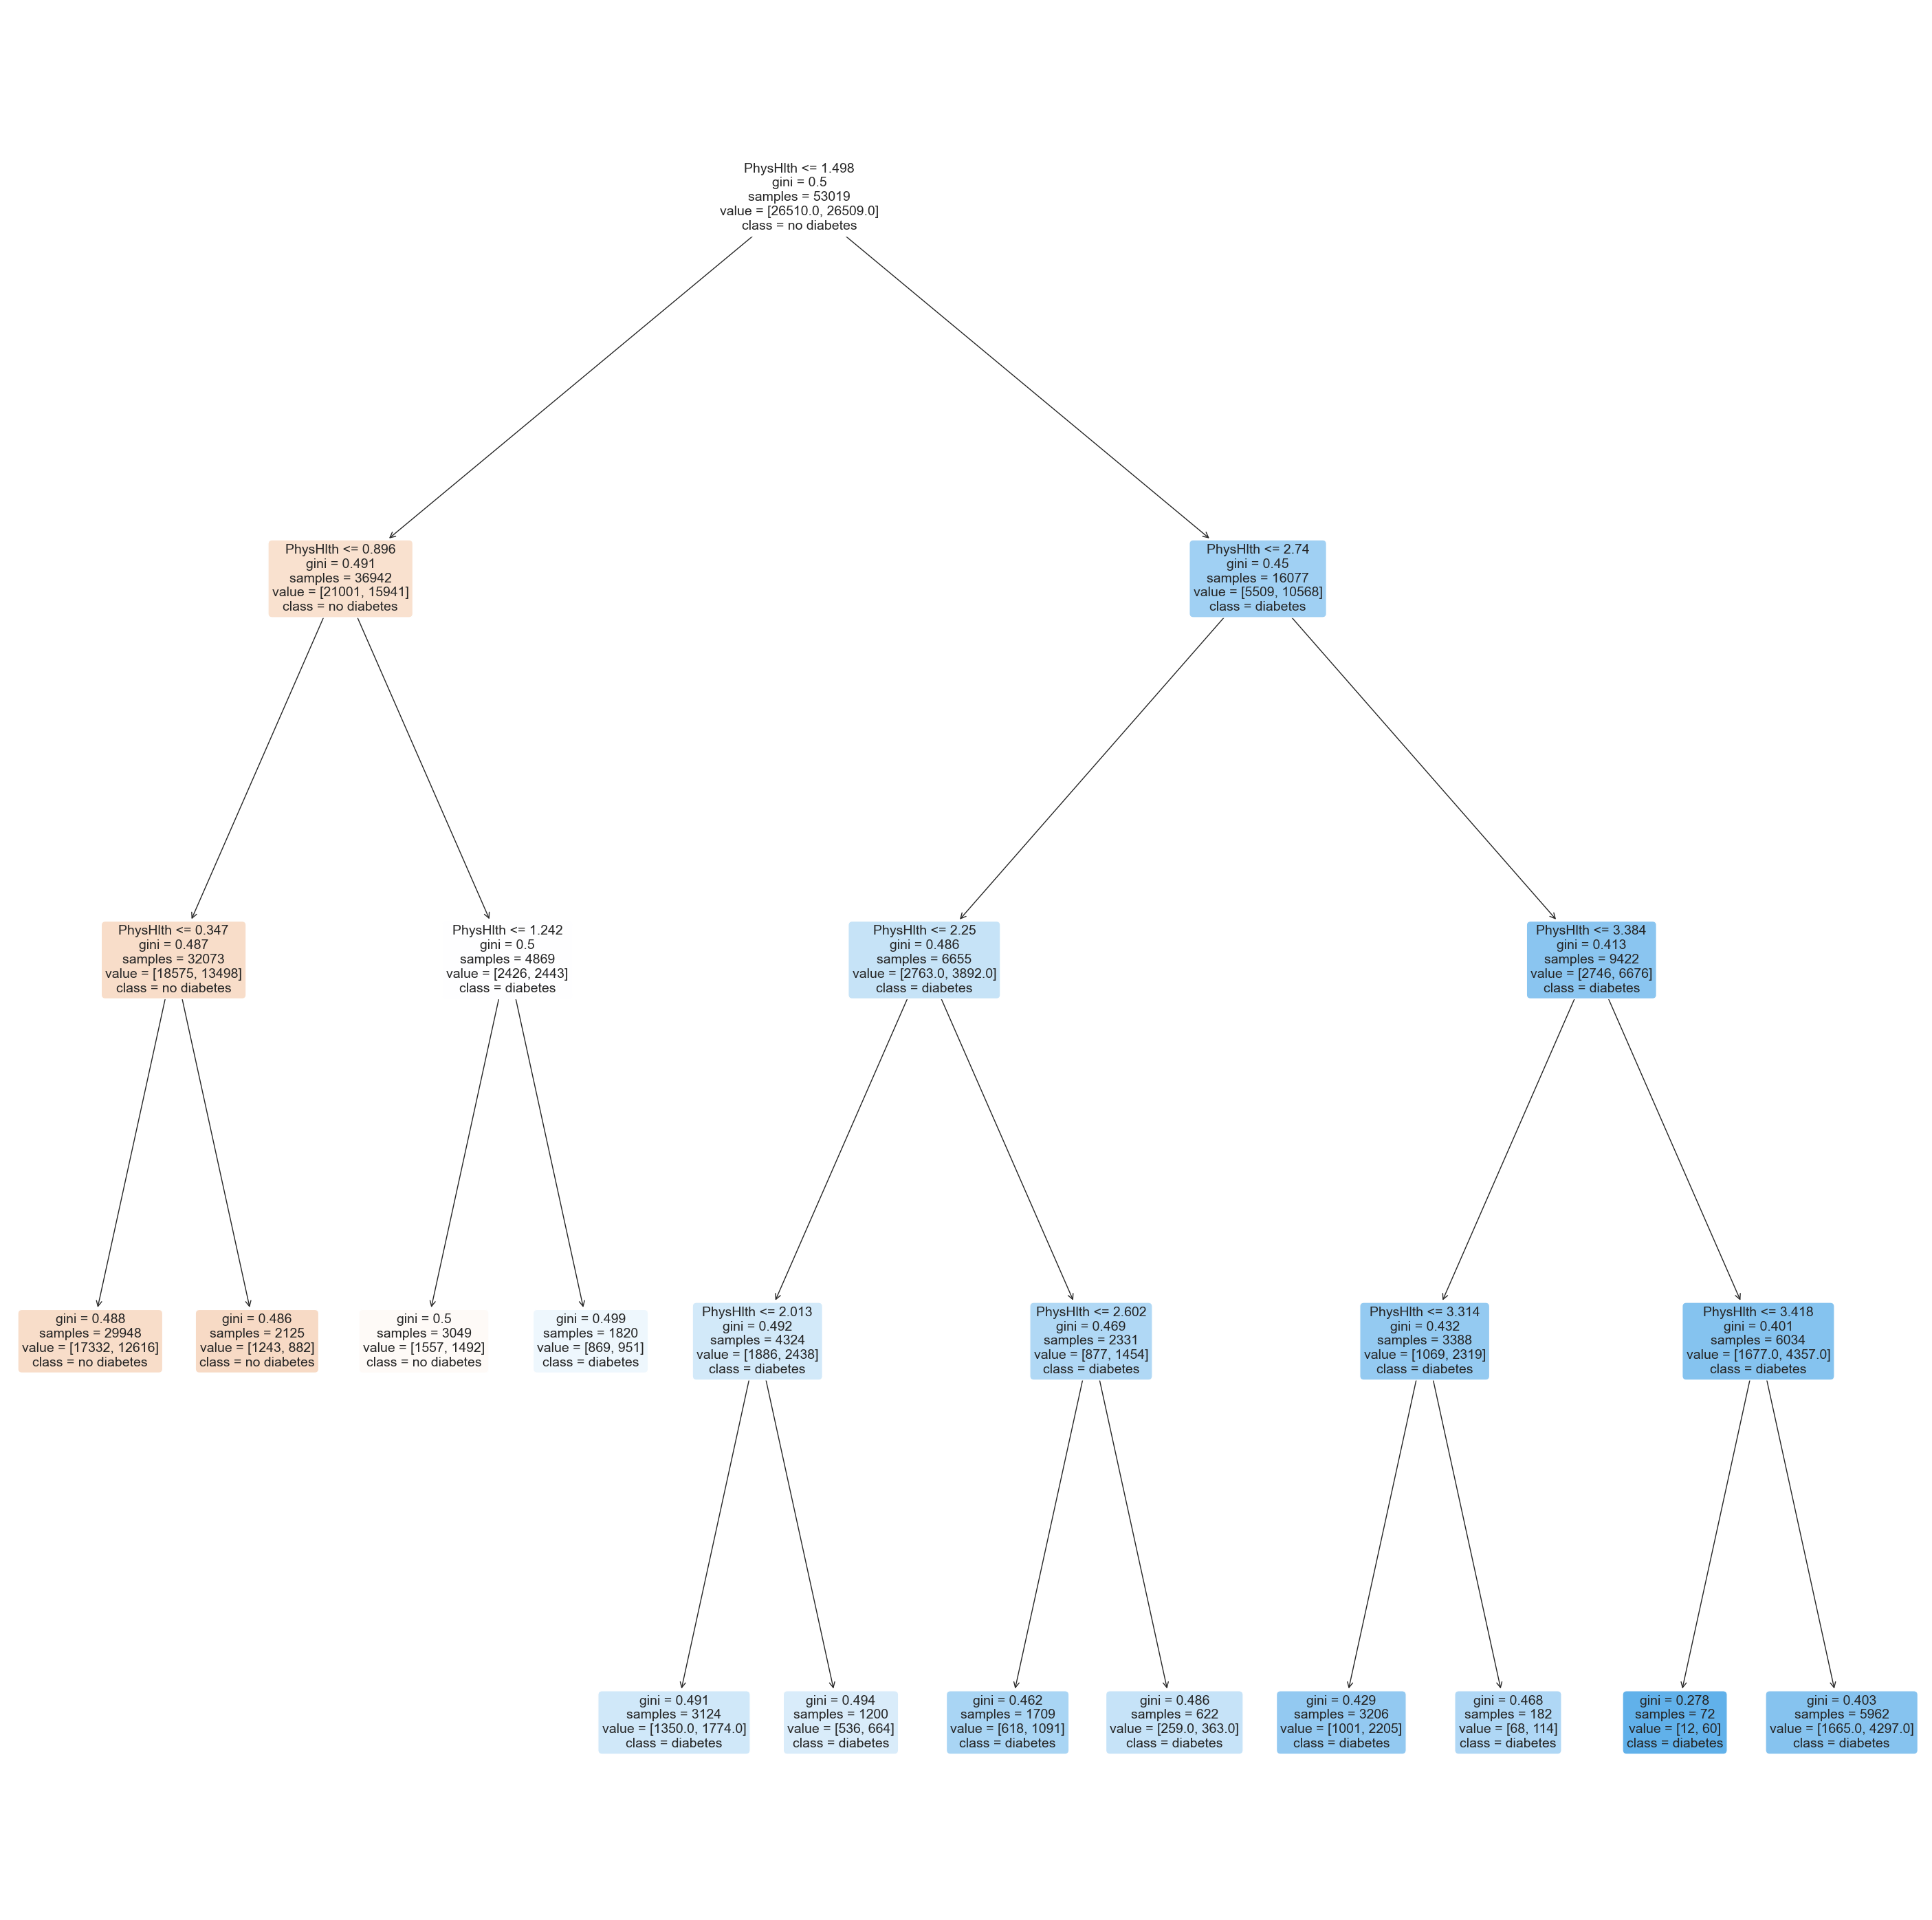

In [55]:
# PHYSHLTH DEC TREE
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(PhysHlth_train, diabetes_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["PhysHlth"], 
          class_names=["no diabetes","diabetes"])

The skewed nature of the data makes analysis using a classification tree less effective. Decision trees are extremely sensitive to sampling variability, and is especially so in the presence of imbalanced data. The tree may struggle to effectively distinguish between minor and majority classes, which would lead to poor separation and classification. In this instance, the classification tree would place higher emphasis on the prevalent class where `PhysHlth` == 0 as compared to the 29 other classes, due to the significant number of data points in this class. This would then result in an inaccurate classification.

This is why we decided to use Multi-Layer Perceptron (MLP) to analyse our skewed data. The flexibility of MLP allows it to adapt to different types of data distribution. By learning from the data, MLP is able to adjust its parameters to effectively model the underlying patterns, even in the presence of skewed data. On top of this, MLPs can also employ class weighting techniques to address class imbalance. By assigning higher weights to minority classes, MLPs are able to learn to focus more on these classes during training, which can lead to better performance. 

In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
'''
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
'''
reg  = MLPRegressor(random_state=1, max_iter=500).fit(PhysHlth_train, np.ravel(diabetes_train.astype(int)))
reg.predict(PhysHlth_train[:1])
reg.score(PhysHlth_train, diabetes_train)

0.05003725733794051

In [57]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=500).fit(PhysHlth_train, np.ravel(diabetes_train.astype(int)))
clf.predict(PhysHlth_train[:1])
clf.score(PhysHlth_train, diabetes_train)

0.5969746694581188

#### BMI

In [58]:
BMI = pd.DataFrame(numeric_data['BMI'])
diabetes = pd.DataFrame(numeric_data['Diabetes_binary'])

BMI_train, BMI_test, diabetes_train, diabetes_test = train_test_split(BMI, diabetes, test_size = 0.25)
print("DATA SET: [BMI, diabetes binary]")
print("Train Set :", BMI_train.shape, diabetes_train.shape)
print("Test Set  :", BMI_test.shape, diabetes_test.shape)

BMI_train_DF = pd.concat([BMI_train,diabetes_train], axis = 1).reindex(diabetes_train.index)

DATA SET: [BMI, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

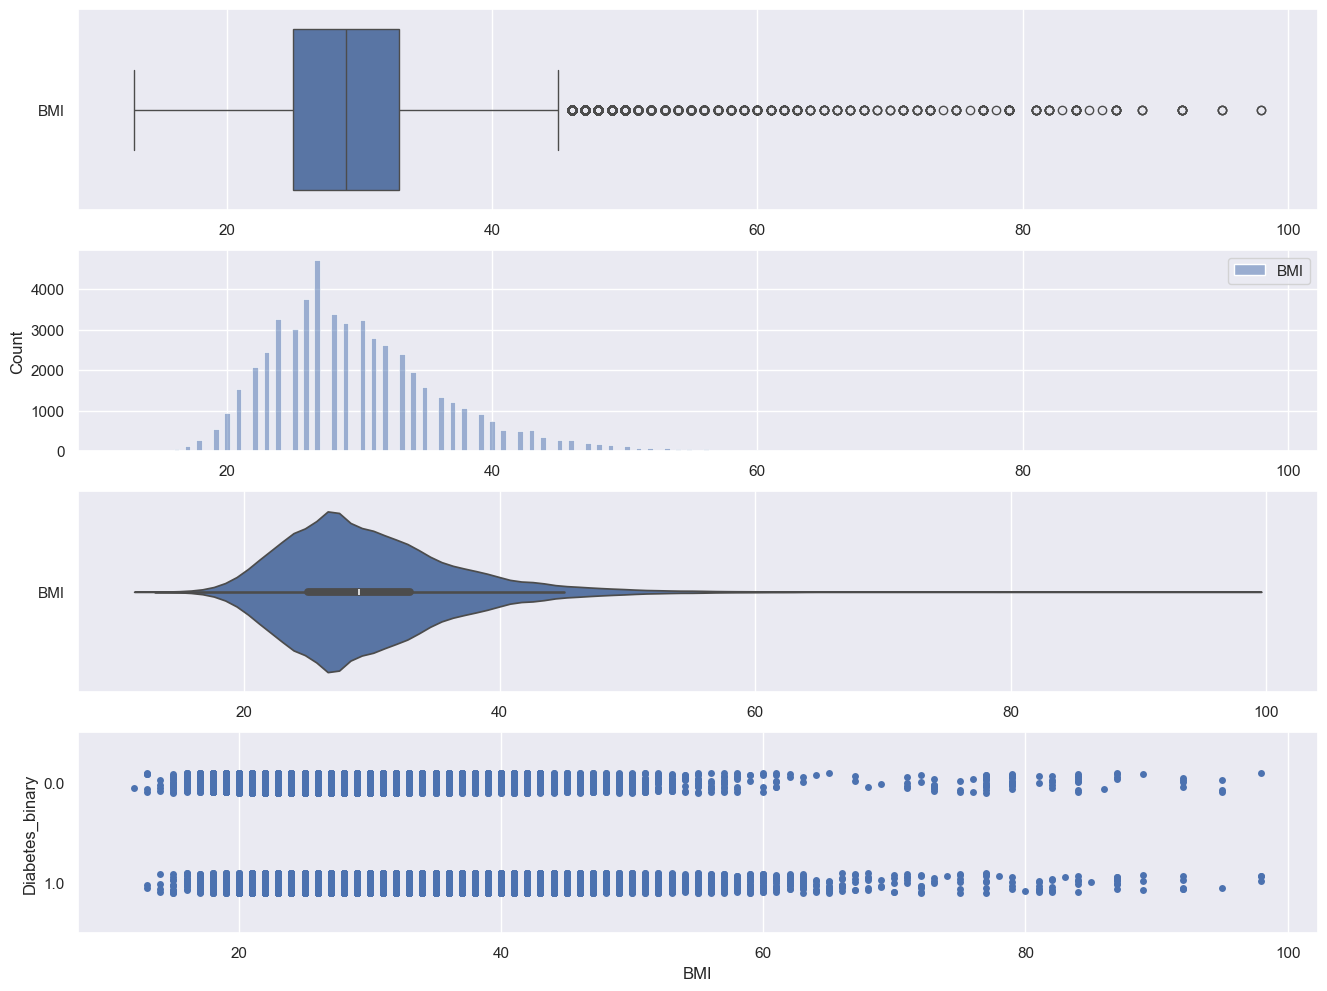

In [59]:
f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = BMI_train, orient = "h", ax = axes[0])
sb.histplot(data = BMI_train, ax = axes[1])
sb.violinplot(data = BMI_train, orient = "h", ax = axes[2])

#gives error when x is BMI and y is diabetes
sb.stripplot(x = numeric_data['BMI'], y = numeric_data['Diabetes_binary'], data = BMI_train_DF, orient = "h", ax = axes[3])


From the histogram, it's evident that the data distribution is sloghtly right-skewed, characterized by a long right tail and a peak closer to the left side. This suggests that the majority of data points are concentrated towards the lower end,  with most of the respondents having a BMI less than 40. This shows that most of the collected data take on lower values as opposed to higher values. 

Given this slight skewness, we considered that adjustments such as applying logistic regression could be beneficial in handling the data more effectively as logistic regression is robust to outliers.

[Text(0.4791666666666667, 0.9, 'BMI <= 27.5\ngini = 0.5\nsamples = 53019\nvalue = [26616.0, 26403.0]\nclass = no diabetes'),
 Text(0.22916666666666666, 0.7, 'BMI <= 23.5\ngini = 0.445\nsamples = 22812\nvalue = [15197.0, 7615.0]\nclass = no diabetes'),
 Text(0.125, 0.5, 'BMI <= 22.5\ngini = 0.367\nsamples = 8043\nvalue = [6097, 1946]\nclass = no diabetes'),
 Text(0.08333333333333333, 0.3, 'BMI <= 20.5\ngini = 0.351\nsamples = 5593\nvalue = [4325, 1268]\nclass = no diabetes'),
 Text(0.041666666666666664, 0.1, 'gini = 0.327\nsamples = 1995\nvalue = [1585, 410]\nclass = no diabetes'),
 Text(0.125, 0.1, 'gini = 0.363\nsamples = 3598\nvalue = [2740, 858]\nclass = no diabetes'),
 Text(0.16666666666666666, 0.3, 'gini = 0.4\nsamples = 2450\nvalue = [1772, 678]\nclass = no diabetes'),
 Text(0.3333333333333333, 0.5, 'BMI <= 25.5\ngini = 0.473\nsamples = 14769\nvalue = [9100, 5669]\nclass = no diabetes'),
 Text(0.25, 0.3, 'BMI <= 24.5\ngini = 0.449\nsamples = 6298\nvalue = [4153, 2145]\nclass = no

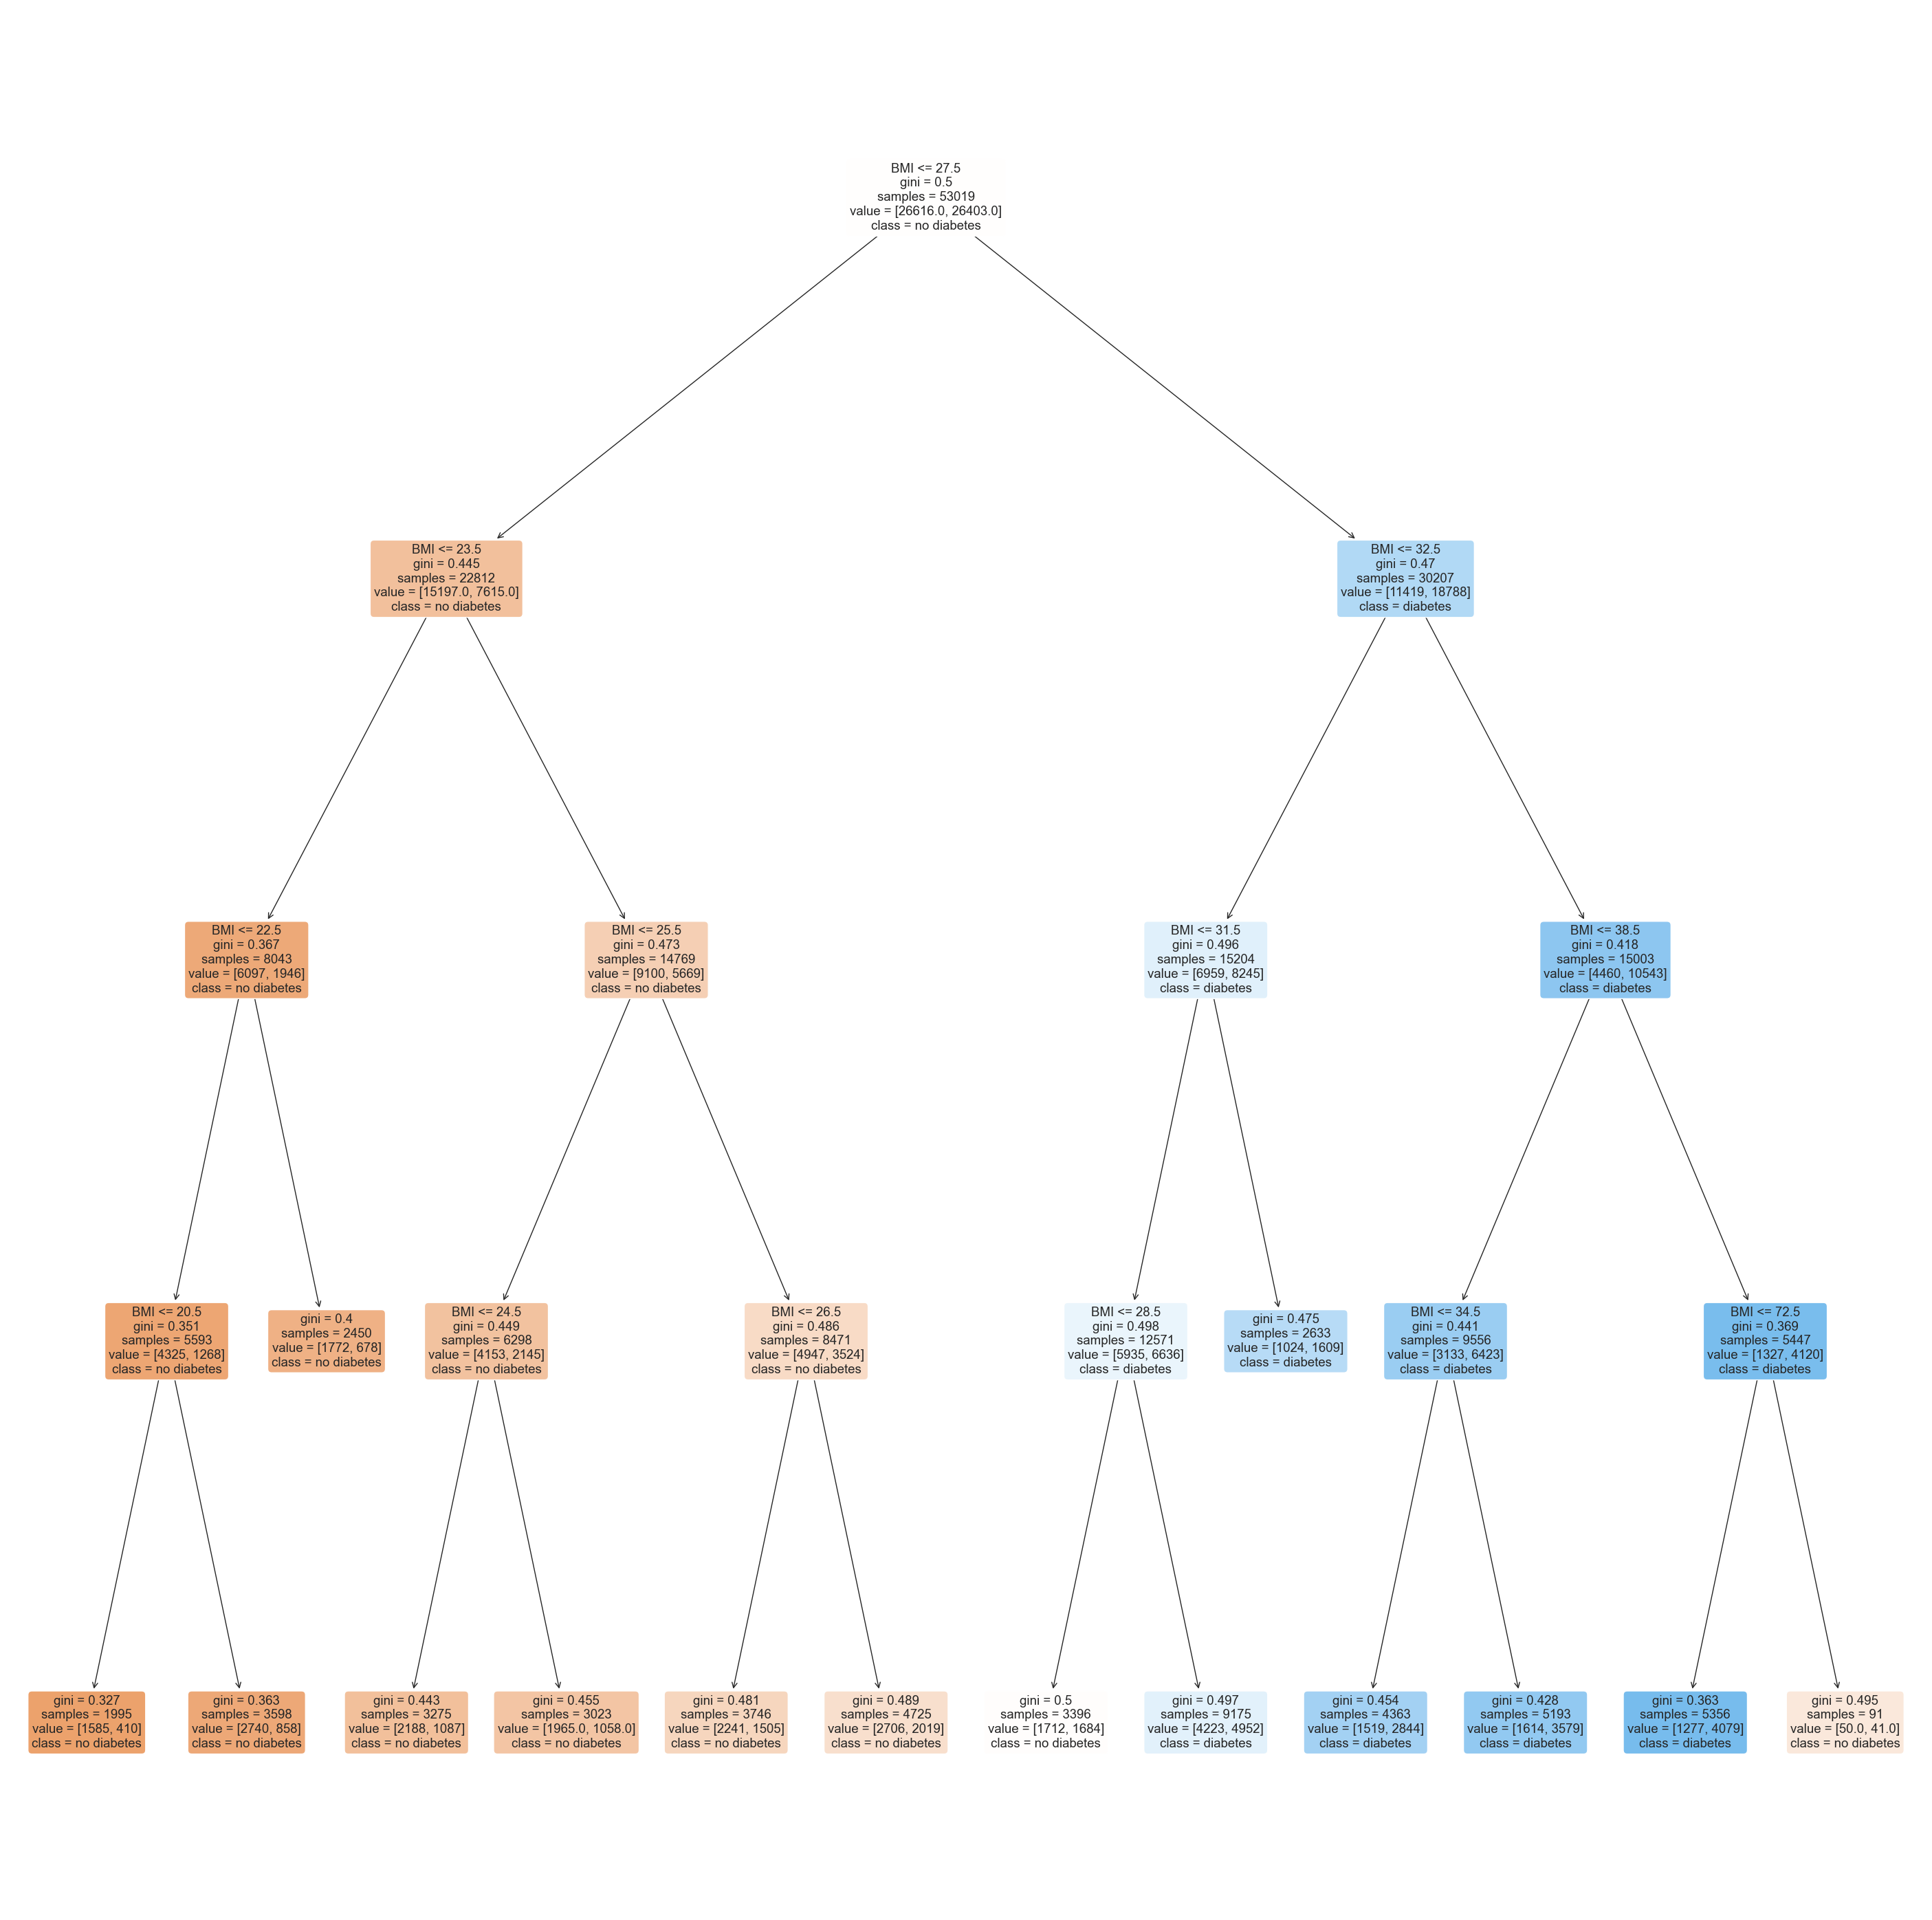

In [60]:
# BMI DEC TREE 
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(BMI_train, diabetes_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["BMI"], 
          class_names=["no diabetes","diabetes"])

From the leaf nodes of the classification tree, we can easily see that the Gini impurity generally takes a value above 0.400, with only a few leaf nodes that have a slightly lower value around 0.300. This suggests high uncertainty in the nodes, as Gini impurity is a measure of the likelihood of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the node. This could indicate that the classification tree struggles to separate the classes and make accurate predictions, possibly due to the skewness of the data.

### Logistic Regression:

**Rationale:**
Since `BMI` can be considered as normally distributed despite the slight right skew based on the histogram above, we chose to use Logistic Regression instead to target this variable 

Response Variable: `Diabetes`<br>
Predcitor Variable: `BMI`<br>



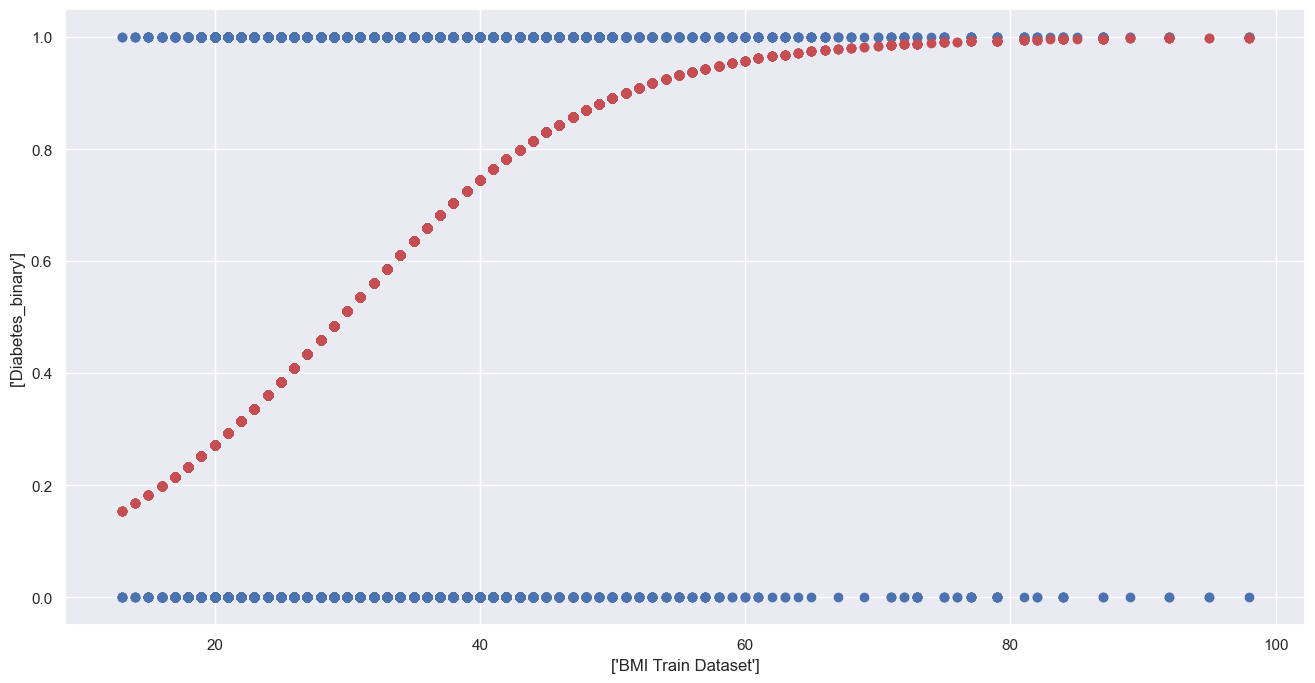

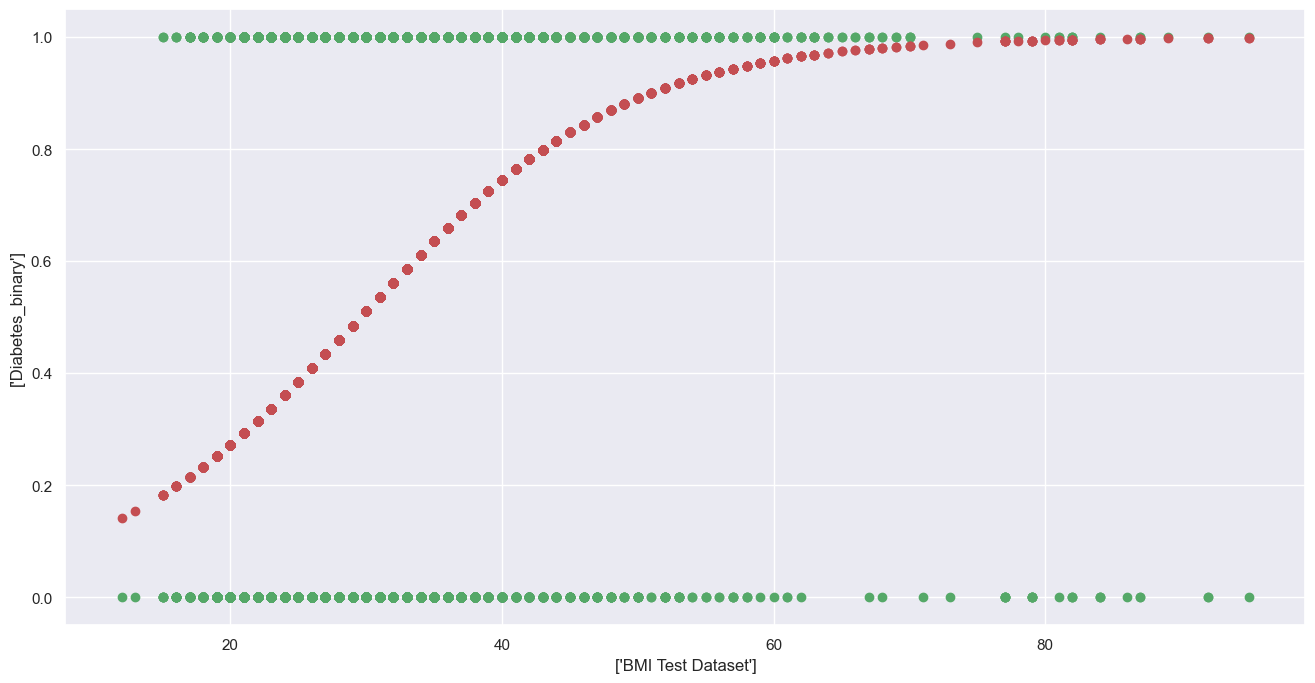

In [33]:
#Performing the Logistic Regression
from sklearn.linear_model import LogisticRegression

#instantiating the model
logreg = LogisticRegression()
logreg.fit(BMI_train, np.ravel(diabetes_train.astype(int)))

diabetes_train_pred = logreg.predict(BMI_train)
diabetes_test_pred = logreg.predict(BMI_test)
'''
sorted_indices = np.argsort(BMI_train[:,0])
sorted_BMI_train = np.take_along_axis(BMI_train, sorted_indices, axis = 0).flatten()
sorted_diabetes_train_pred = diabetes_train_pred[sorted_indices].reshape(-1,1)
plt.scatter(BMI_train, diabetes_train, color = 'b')
plt.plot(sorted_BMI_train, logreg.predict_proba(np.array(sorted_BMI_train).reshape(-1,1))[:,1], color = 'r')
'''
#Plot the Regression Line for both train and test dataset
f = plt.figure(figsize = (16,8))
plt.scatter(BMI_train,diabetes_train)
plt.scatter(BMI_train,logreg.predict_proba(BMI_train)[:,1],color = 'r')
plt.xlabel(BMI_train.columns.values + " Train Dataset")
plt.ylabel(diabetes_train.columns.values)

f = plt.figure(figsize = (16,8))
plt.scatter(BMI_test, diabetes_test, color = 'g')
plt.scatter(BMI_test, logreg.predict_proba(BMI_test)[:,1],color = 'r')
plt.xlabel(BMI.columns.values + " Test Dataset")
plt.ylabel(diabetes.columns.values)

plt.show()


True Postive Rate: 		 0.5833333333333334
False Positive Rate: 		 0.34658778787238537

True Postive Rate: 		 0.5763747454175153
False Positive Rate: 		 0.34516004627844193



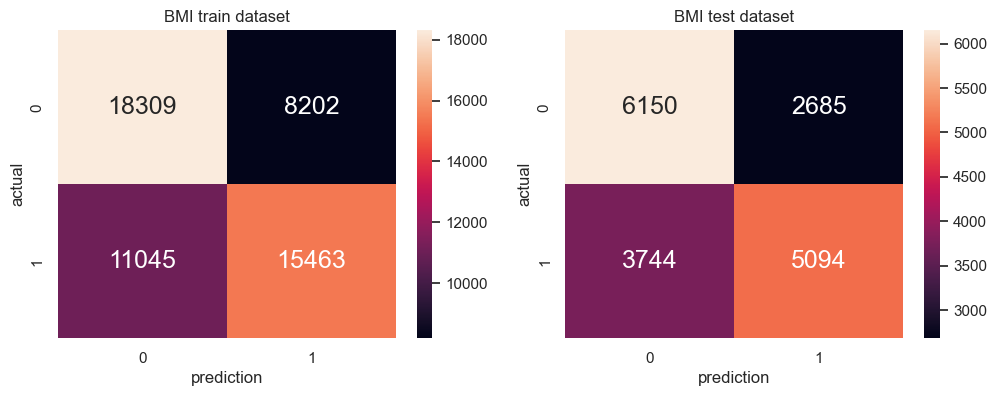

In [34]:
from sklearn.metrics import confusion_matrix

#Calculating FP and TP values
train_matrix = confusion_matrix(diabetes_train, diabetes_train_pred)
FP_train = train_matrix[0][1]
TP_train = train_matrix[1][1]
FN_train = train_matrix[1][0]
TN_train = train_matrix[1][1]
print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
print()
test_matrix = confusion_matrix(diabetes_test,diabetes_test_pred)
FP_test = test_matrix[0][1]
TP_test = test_matrix[1][1]
FN_test = test_matrix[1][0]
TN_test = test_matrix[1][1]
print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
print()
f, axes = plt.subplots(1, 2, figsize = (12,4))
sb.heatmap(train_matrix,
          annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
axes[0].set_title('BMI train dataset')
axes[0].set_xlabel('prediction')
axes[0].set_ylabel('actual')
sb.heatmap(test_matrix,
          annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
axes[1].set_title('BMI test dataset')
axes[1].set_xlabel('prediction')
axes[1].set_ylabel('actual')

plt.show()

In [35]:
from sklearn.metrics import classification_report
target_names = ['no diabetes', 'have diabetes']
print(classification_report(diabetes_test,diabetes_test_pred, target_names = target_names))

               precision    recall  f1-score   support

  no diabetes       0.62      0.70      0.66      8835
have diabetes       0.65      0.58      0.61      8838

     accuracy                           0.64     17673
    macro avg       0.64      0.64      0.63     17673
 weighted avg       0.64      0.64      0.63     17673



precision: when predicted, how much % will patients have it   
recall: able to identify patients with diabetes 62% of the time

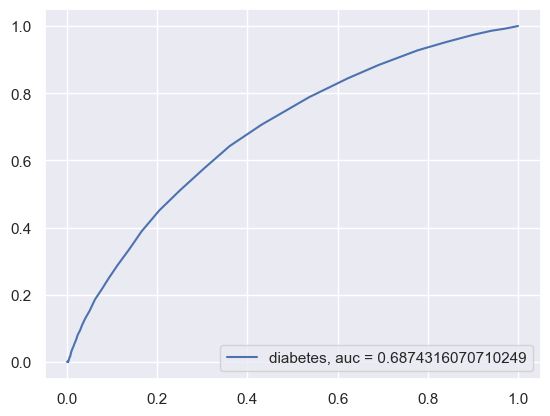

In [36]:
from sklearn import metrics
diabetes_pred_proba = logreg.predict_proba(BMI_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(diabetes_test, diabetes_pred_proba)
auc = metrics.roc_auc_score(diabetes_test, diabetes_pred_proba)

plt.plot(fpr,tpr,label = "diabetes, auc = " + str(auc))
plt.legend(loc=4)
plt.show()

AUC 1 is perfect and 0.5 is dogshit   
ROC curve is a plot of the TP rate against the FP rate

numerical Data - use logistic regression for numerical to binary and use correlation matrix to evaluate the values

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Binary Data

### Support Vector Machine (SVM)

SVM is a classification approach to construct a hyperplane to separate different classes. The margin is defined as the perpendicular distance between the closest class point to the line which separates the different classes. SVM aims to select the best hyperplane with the greatest margin

Response Variable: `Diabetes`<br>
Predictor Variable 1: `HighBP`<br>
Predictor Variable 2: `HighChol`<br>
Predictor Variable 3: `DiffWalk`<br>


The SVM algorithm relies on a technique called kernel trick by introducing dimensions to convert non-separable problems into separable problems.   

Since the dataset only has 4 repeated points, We chose to use **Linear Kernel** which is the dot product of any two given observations as it can be seperated by linear planes.   
1. Using the **Linear Kernel** SVM algorithm, we predict the values of the train and test dataset for `HighBP`, `HighChol` and `DiffWalk`
2. Compute the classification report for both the train and test dataset for `HighBP`, `HighChol` and `DiffWalk`
3. Compare the classification reports of all 3 predictor variables to determine the best binary variable to classify whether people have diabetes correctly

In [37]:
highBP = pd.DataFrame(binary_data['HighBP'])
highChol = pd.DataFrame(binary_data['HighChol'])
DiffWalk = pd.DataFrame(binary_data['DiffWalk'])
diabetes_binary = pd.DataFrame(binary_data['Diabetes_binary'])


def SupportVectorMachine(predictor, response):
    print("The Support Vector Machine is to predict " + response.columns + " based on " + predictor.columns)
    print()
    
    #Segmenting the train and test data for both the predictor and response
    #Train set is 75% and Test set is 25%
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor, response, test_size = 0.25)
    print("Train set:", predictor_train.shape, response_train.shape)
    print("Test set:", predictor_test.shape, response_test.shape)
    print()
    
    #Create the SVM Object - Linear Kernel
    clf = svm.SVC(kernel = 'linear')
    
    #Train the model using the train set
    clf.fit(predictor_train, np.ravel(response_train.astype(int)))
    
    #Predict the response value for both the train and test datasets
    response_train_pred = clf.predict(predictor_train)
    response_test_pred = clf.predict(predictor_test)
    
    #Print the classification report
    target_names = ['no diabetes', 'have diabetes']
    print("Classification Report for " + predictor.columns + " Train Dataset")
    print(classification_report(response_train,response_train_pred, target_names = target_names))
    print()
    print("Classification Report for " + predictor.columns + " Test Dataset")
    print(classification_report(response_test,response_test_pred, target_names = target_names)) 
    
    #Calculating the FP and TP values
    train_matrix = confusion_matrix(response_train, response_train_pred)
    FP_train = train_matrix[0][1]
    TP_train = train_matrix[1][1]
    FN_train = train_matrix[1][0]
    TN_train = train_matrix[0][0]
    print("\t\tTrain Dataset")
    print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
    print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
    print()
    
    test_matrix = confusion_matrix(response_test, response_test_pred)
    FP_test = test_matrix[0][1]
    TP_test = test_matrix[1][1]
    FN_test = test_matrix[1][0]
    TN_test = test_matrix[0][0]
    print("\t\tTest Dataset")
    print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
    print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
    print()

    #Plot the Confusion Matrix for Train and Test
    test_matrix = confusion_matrix(response_test, response_test_pred)
    f, axes = plt.subplots(1, 2, figsize = (12,4))
    sb.heatmap(train_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
    axes[0].set_xlabel('prediction')
    axes[0].set_ylabel('acutal')

    sb.heatmap(test_matrix,
              annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
    axes[1].set_xlabel('prediction')
    axes[1].set_ylabel('acutal')
    
    
    plt.show()

SupportVectorMachine(highBP,diabetes_binary)
SupportVectorMachine(highChol,diabetes_binary)
SupportVectorMachine(DiffWalk,diabetes_binary)

Index(['The Support Vector Machine is to predict Diabetes_binary based on HighBP'], dtype='object')

Train set: (53019, 1) (53019, 1)
Test set: (17673, 1) (17673, 1)



NameError: name 'svm' is not defined

Comparing `HighBP`, `HighChol` and `DiffWalk`:

1. **Accuracy** measures the proportion of **correct predictions out of the total number of predictions**
2. **Precision** measures the proportion of **true positive predictions among all positive predictions**. It focuses on the **accuracy of positive predictions**.
3. **Recall** measures the proportion of **true positive predictions among all actual positive instances**. It focuses on the ability of the classifier to **correctly identify positive instances**.
4. **F1 score** is the **harmonic mean of precision and recall**. It focuses on **balancing precision and recall**.
    - The F1 score for the Class of **have diabetes** indicates the model's abiility to correctly identify **patients with diabetes** and **minimises the misclassification of non-diabetic patients as diabetic**
    - The F1 score for the Class of **no diabetes** indicates the model's ability to correctly identify **non-diabetic patients** and **minimises the misclassification of diabetic patients as non-diabetic**

Within the **Train** dataset, 
1. `HighBP`, `HighChol` and `DiffWalk` have accuracies of **69%**, **64%** and **62%** 
2. `HighBP`, `HighChol` and `DiffWalk` have **67%**, **64%** and **70%** for F1 scores for _no diabetes_
3. `HighBP`, `HighChol` and `DiffWalk` have **71%**, **65%** and **49%** for F1 scores for _have diabetes_

Within the **Test** dataset,
1. `HighBP`, `HighChol` and `DiffWalk` have accuracies of **69%**, **64%** and **62%** 
2. `HighBP`, `HighChol` and `DiffWalk` have **67%**, **63%** and **69%** for F1 scores for _no diabetes_
3. `HighBP`, `HighChol` and `DiffWalk` have **71%**, **66%** and **49%** for F1 scores for _have diabetes_

This implies that `HighBP` is the most accurate predictor and is able to correctly identify the **diabetic** patients while making the least misclassifications of **non-diabetic** as **diabetic**.    
Meanwhile, `HighChol` only has a moderate performance in terms of accuracy as well as identifying **diabetic** and **non-diabetic** as its F1 scores are not as high as `HighBP`.    
Even though `DiffWalk` has a lowest accuracy and the F1 score for **diabetic** is quite low, the F1 score for **non-diabetic** is quite high which suggests that `DiffWalk` classfies most of the dataset as **non-diabetic** which results in a better F1 score for **non-diabetic** but a worse F1 score for **diabetic**   
Overall, `HighBP` is the **best binary predictor** in the diabetic dataset to predict whether a person is **diabetic _correctly_**

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - OneHot Data

In [87]:
crosstabAge = pd.crosstab(oneHot_data['Age'], oneHot_data['Diabetes_binary'])
ageColumnSum = crosstabAge.sum(axis=1)
print("Number of observations in each level of the 'Age' column:")
print(ageColumnSum)


Number of observations in each level of the 'Age' column:
Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
dtype: int64


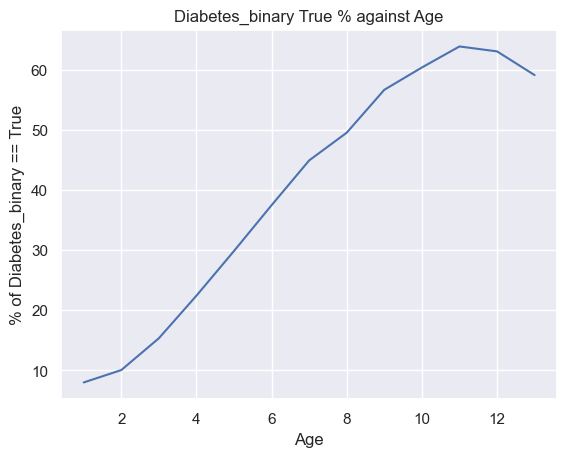

In [90]:
age_diabetes = oneHot_data[['Age', 'Diabetes_binary']].copy()
age_diabetes['Diabetes_binary'] = age_diabetes['Diabetes_binary'].replace({1.0: "True", 0.0: "False"})

# Calculate the percentage of 'Diabetes_binary' being True for each income level
age_diabetes['Diabetes_True'] = (age_diabetes['Diabetes_binary'] == "True")
age_diabetes_true_percentage = age_diabetes.groupby('Age')['Diabetes_True'].mean() * 100

# Plotting
age_diabetes_true_percentage.plot()

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('% of Diabetes_binary == True')
plt.title('Diabetes_binary True % against Age')

# Displaying the plot
plt.show()


In [89]:
crosstabGenHlth = pd.crosstab(oneHot_data['GenHlth'], oneHot_data['Diabetes_binary'])
genHlthColumnSum = crosstabGenHlth.sum(axis=1)
print("Number of observations in each level of the 'GenHlth' column:")
print(genHlthColumnSum)


Number of observations in each level of the 'GenHlth' column:
GenHlth
1.0     8282
2.0    19872
3.0    23427
4.0    13303
5.0     5808
dtype: int64


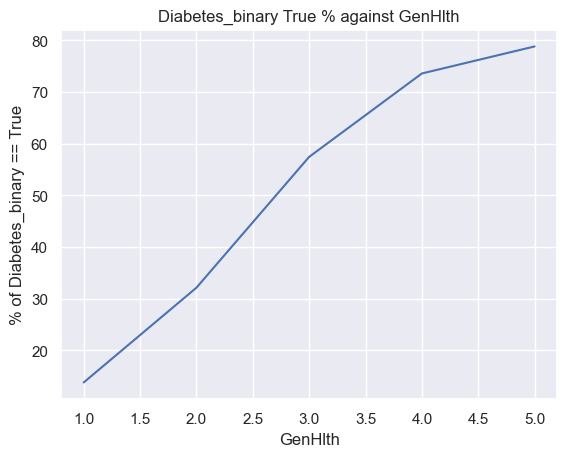

In [93]:
gh_diabetes = oneHot_data[['GenHlth', 'Diabetes_binary']].copy()
gh_diabetes['Diabetes_binary'] = gh_diabetes['Diabetes_binary'].replace({1.0: "True", 0.0: "False"})

# Calculate the percentage of 'Diabetes_binary' being True for each income level
gh_diabetes['Diabetes_True'] = (gh_diabetes['Diabetes_binary'] == "True")
gh_diabetes_true_percentage = gh_diabetes.groupby('GenHlth')['Diabetes_True'].mean() * 100

# Plotting
gh_diabetes_true_percentage.plot()

# Adding labels and title
plt.xlabel('GenHlth')
plt.ylabel('% of Diabetes_binary == True')
plt.title('Diabetes_binary True % against GenHlth')

# Displaying the plot
plt.show()

In [88]:
crosstabIncome = pd.crosstab(oneHot_data['Income'], oneHot_data['Diabetes_binary'])
incomeColumnSum = crosstabIncome.sum(axis=1)
print("Number of observations in each level of the 'Income' column:")
print(incomeColumnSum)


Number of observations in each level of the 'Income' column:
Income
1.0     3611
2.0     4498
3.0     5557
4.0     6658
5.0     8010
6.0    10287
7.0    11425
8.0    20646
dtype: int64


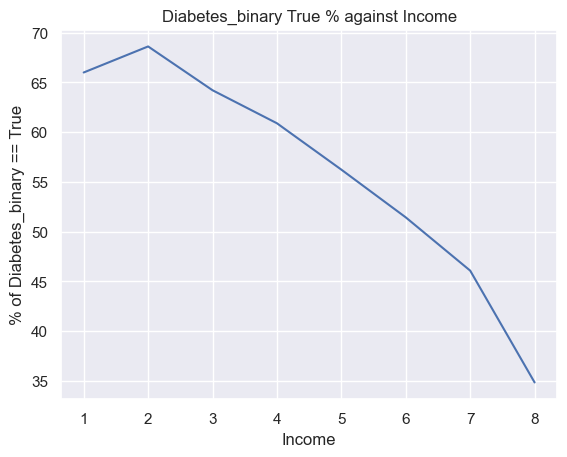

In [94]:
income_diabetes = oneHot_data[['Income', 'Diabetes_binary']].copy()
income_diabetes['Diabetes_binary'] = income_diabetes['Diabetes_binary'].replace({1.0: "True", 0.0: "False"})

# Calculate the percentage of 'Diabetes_binary' being True for each income level
income_diabetes['Diabetes_True'] = (income_diabetes['Diabetes_binary'] == "True")
income_diabetes_true_percentage = income_diabetes.groupby('Income')['Diabetes_True'].mean() * 100

# Plotting
income_diabetes_true_percentage.plot()

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('% of Diabetes_binary == True')
plt.title('Diabetes_binary True % against Income')

# Displaying the plot
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


### GenHlth vs Diabetes_binary

In [68]:
genHlth = pd.DataFrame(oneHot_data['GenHlth'])

genHlth_train, genHlth_test, diabetes_GH_train, diabetes_GH_test = train_test_split(genHlth, diabetes, test_size = 0.25)
print("DATA SET: [GenHlth, diabetes binary]")
print("Train Set :", genHlth_train.shape, diabetes_GH_train.shape)
print("Test Set  :", genHlth_test.shape, diabetes_GH_test.shape)

genHlth_train_DF = pd.concat([genHlth_train,diabetes_GH_train], axis = 1).reindex(diabetes_GH_train.index)


DATA SET: [GenHlth, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [69]:
# Train the model
rf_model.fit(genHlth_train, diabetes_GH_train)


C:\Users\Tan Yichen\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [70]:
diabetes_GH_pred = rf_model.predict(genHlth_test)
# Calculate accuracy
accuracy = accuracy_score(diabetes_GH_test, diabetes_GH_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_GH_test, diabetes_GH_pred))

Accuracy: 0.6839812142816726
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65      8851
         1.0       0.65      0.79      0.71      8822

    accuracy                           0.68     17673
   macro avg       0.69      0.68      0.68     17673
weighted avg       0.69      0.68      0.68     17673



### Age vs Diabetes_binary

In [65]:
ages = pd.DataFrame(oneHot_data['Age'])
diabetes = pd.DataFrame(oneHot_data['Diabetes_binary'])

Age_train, Age_test, diabetes_age_train, diabetes_age_test = train_test_split(ages, diabetes, test_size = 0.25)
print("DATA SET: [Age, diabetes binary]")
print("Train Set :", Age_train.shape, diabetes_age_train.shape)
print("Test Set  :", Age_test.shape, diabetes_age_test.shape)

Age_train_DF = pd.concat([Age_train,diabetes_age_train], axis = 1).reindex(diabetes_age_train.index)

DATA SET: [Age, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [66]:
# Train the model
rf_model.fit(Age_train, diabetes_age_train)

C:\Users\Tan Yichen\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [67]:
diabetes_age_pred = rf_model.predict(Age_test)
# Calculate accuracy
accuracy = accuracy_score(diabetes_age_test, diabetes_age_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_age_test, diabetes_age_pred))

Accuracy: 0.6170995303570418
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59      8832
         1.0       0.60      0.68      0.64      8841

    accuracy                           0.62     17673
   macro avg       0.62      0.62      0.62     17673
weighted avg       0.62      0.62      0.62     17673



### Income vs Diabetes_binary

In [71]:
income = pd.DataFrame(oneHot_data['Income'])

income_train, income_test, diabetes_income_train, diabetes_income_test = train_test_split(income, diabetes, test_size = 0.25)
print("DATA SET: [Income, diabetes binary]")
print("Train Set :", income_train.shape, diabetes_income_train.shape)
print("Test Set  :", income_test.shape, diabetes_income_test.shape)

income_train_DF = pd.concat([income_train,diabetes_income_train], axis = 1).reindex(diabetes_income_train.index)


DATA SET: [Income, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [72]:
# Train the model
rf_model.fit(income_train, diabetes_income_train)


C:\Users\Tan Yichen\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [73]:
diabetes_income_pred = rf_model.predict(income_test)
# Calculate accuracy
accuracy = accuracy_score(diabetes_income_test, diabetes_income_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(diabetes_income_test, diabetes_income_pred))


Accuracy: 0.6026707406778702
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58      8791
         1.0       0.60      0.65      0.62      8882

    accuracy                           0.60     17673
   macro avg       0.60      0.60      0.60     17673
weighted avg       0.60      0.60      0.60     17673

